In [1]:
import jax
import jax.numpy as jnp
from evosax import ParameterReshaper
import ipyplot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Setup

### Create environment

In [2]:
import gymnax as gym

In [3]:
env_name = "MountainCar-v0"
env, env_params = gym.make(env_name)
n_actions = env.action_space(env_params).n
obs_dims = env.observation_space(env_params).shape[0]

In [4]:
env_steps = env_params.max_steps_in_episode

### Create NDP

In [5]:
from models import HyperNCA, HyperNCA_Config

In [6]:
# MLP configuration
mlp_hidden_dims = max((obs_dims, n_actions)) # nb of features for each hidden layer
mlp_hidden_layers = 1 # nb of hidden layers
mlp_action_dims = n_actions 
mlp_obs_dims = obs_dims

In [7]:
# NCA Configuration
channels = 4
alpha = 0.1 # alive threshold
perception_dims = 3 # nb of perception kernels
update_features = (16,) # hidden features of update network

iterations = 20 #number of development steps

In [8]:
ndp_config = HyperNCA_Config(
    channels = channels,
    alpha = alpha,
    perception_dims = perception_dims,
    update_features = update_features,
    iterations = iterations,
    action_dims = n_actions,
    obs_dims = obs_dims,
    hidden_dims = mlp_hidden_dims,
    hidden_layers = mlp_hidden_layers
)

In [9]:
ndp = HyperNCA(ndp_config)

In [10]:
z_dims = ndp.z_dims # nb of dimensions of the latent space (channels)
z_dims

4

In [11]:
ndp_params = ndp.init(jax.random.PRNGKey(42), jnp.ones((z_dims, )))
parameter_reshaper = ParameterReshaper(ndp_params)

ParameterReshaper: 580 parameters detected for optimization.


### Create evaluator

In [12]:
from evaluators import DiversityEvaluator, DiversityEvaluator_Config 
from envs import bd_mountain_car

In [13]:
evaluator_config = DiversityEvaluator_Config(
    epochs = 1,
    env = env,
    env_params = env_params,
    env_steps = 200,
    mlp_hidden_dims = mlp_hidden_dims,
    mlp_hidden_layers = mlp_hidden_layers,
    n_params = z_dims,
    bd_extractor = bd_mountain_car,
    popsize = 10
)

In [14]:
evaluator = DiversityEvaluator(evaluator_config, ndp)

### Create Trainer

In [15]:
from metandp import NDP_Trainer, Config

In [16]:
trainer_config = Config(
    epochs = 150,
    n_params = parameter_reshaper.total_params,
    params_shaper = parameter_reshaper,
    es = "des",
    popsize = 64,
    es_config = {},
    es_params = None
)

In [17]:
ndp_trainer = NDP_Trainer(trainer_config, ndp, evaluator)

# Train

In [18]:
key = jax.random.PRNGKey(42)
es_state, data = ndp_trainer.train(key)

	INNER LOOP #0
OUTER LOOP #0 : avg = 0.03641112893819809, top = 0.07047489285469055, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #1 : avg = 0.034131985157728195, top = 0.06602177768945694, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #2 : avg = 0.03497084602713585, top = 0.052759550511837006, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #3 : avg = 0.0346895232796669, top = 0.050613392144441605, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #4 : avg = 0.03641689568758011, top = 0.05440204590559006, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #5 : avg = 0.033291541039943695, top = 0.060947030782699585, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #6 : avg = 0.0369664803147316, top = 0.05671267956495285, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #7 : avg = 0.03417862206697464, top = 0.05543236434459686, best = -0.07047489285469055
	INNER LOOP #0
OUTER LOOP #8 : avg = 0.03481563180685043, top = 0.05759946256875992, best = -

	INNER LOOP #0
OUTER LOOP #73 : avg = 0.1873040348291397, top = 0.3094618022441864, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #74 : avg = 0.1923985481262207, top = 0.288099080324173, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #75 : avg = 0.19781556725502014, top = 0.2959638237953186, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #76 : avg = 0.17245164513587952, top = 0.2874734401702881, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #77 : avg = 0.20553550124168396, top = 0.2854529023170471, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #78 : avg = 0.21812108159065247, top = 0.2933259904384613, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #79 : avg = 0.22733911871910095, top = 0.29005712270736694, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #80 : avg = 0.20082460343837738, top = 0.2890501022338867, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #81 : avg = 0.20633521676063538, top = 0.2924642860889435, best = -0.32144388556

	INNER LOOP #0
OUTER LOOP #146 : avg = 0.2339557558298111, top = 0.2900915741920471, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #147 : avg = 0.2210076004266739, top = 0.2921161353588104, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #148 : avg = 0.2418934851884842, top = 0.2909829020500183, best = -0.3214438855648041
	INNER LOOP #0
OUTER LOOP #149 : avg = 0.24103596806526184, top = 0.284579336643219, best = -0.3214438855648041


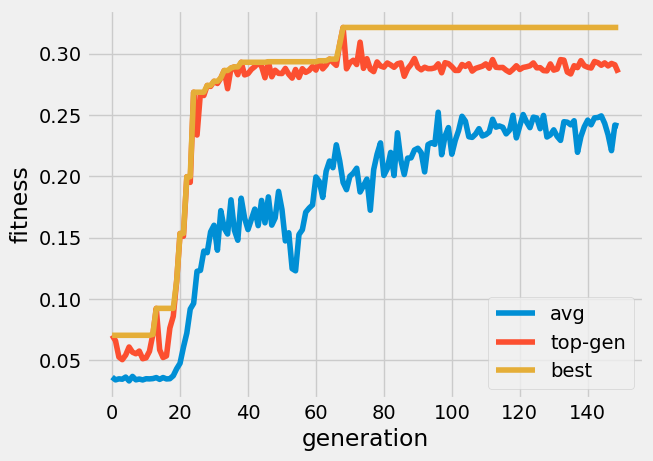

In [19]:
fitness = data['fitness']
avg_fitness = jnp.mean(fitness, axis=-1)
max_fitness = jnp.max(fitness, axis=-1)
best_fitness = -data['es_state'].best_fitness

plt.plot(avg_fitness, label='avg')
plt.plot(max_fitness, label='top-gen')
plt.plot(best_fitness, label='best')
plt.legend()
plt.xlabel('generation')
plt.ylabel('fitness')
plt.show()

In [33]:
best_params = es_state.best_member
best_params = parameter_reshaper.reshape(best_params[None, :])
best_params = jax.tree_map(lambda x: x[0], best_params)
test_key = jax.random.PRNGKey(66)
fit, best_test_data = evaluator.test(test_key, best_params, n_samples=100, 
                                  render=False)
bd_extractor = evaluator.config.bd_extractor
bds_best = jax.vmap(bd_extractor)(best_test_data)

In [35]:
worst_params = data['es_state'].best_member[0]
worst_params = parameter_reshaper.reshape(worst_params[None, :])
worst_params = jax.tree_map(lambda x: x[0], worst_params)
test_key = jax.random.PRNGKey(66)
fit, worst_test_data = evaluator.test(test_key, worst_params, n_samples=100, 
                                  render=False)
bd_extractor = evaluator.config.bd_extractor
bds_worst = jax.vmap(bd_extractor)(worst_test_data)

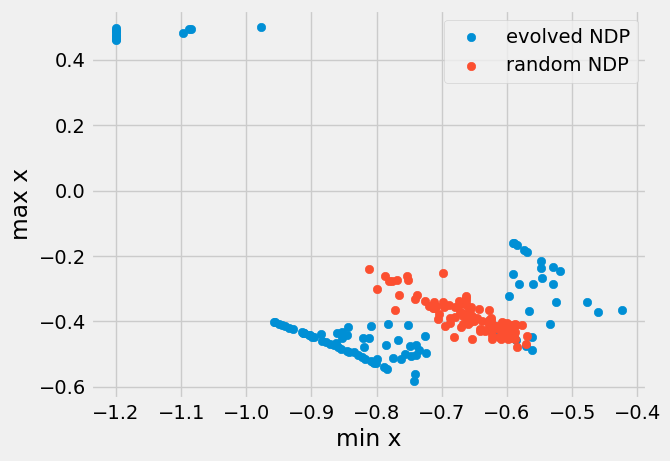

In [43]:
plt.scatter(bds_best[:, 0], bds_best[:, 1], label='evolved NDP')
plt.scatter(bds_worst[:, 0], bds_worst[:, 1], label='random NDP')
plt.legend()
plt.xlabel('min x')
plt.ylabel('max x')
plt.show()

In [41]:
best_test_data['states'].position[0, 0]

Array(-0.5309055, dtype=float32)

# Visualize

In [20]:
# %%capture
# best_params = es_state.best_member
# best_params = parameter_reshaper.reshape(best_params[None, :])
# best_params = jax.tree_map(lambda x: x[0], best_params)
# test_key = jax.random.PRNGKey(66)
# fit, test_data, files = evaluator.test(test_key, best_params, n_samples=5, 
#                                   render=True, save_file="best")

In [21]:
# ipyplot.plot_images(files)

In [26]:
# %%capture
# worst_params = data['es_state'].best_member[0]
# worst_params = parameter_reshaper.reshape(worst_params[None, :])
# worst_params = jax.tree_map(lambda x: x[0], worst_params)
# test_key = jax.random.PRNGKey(66)
# fit, test_data, files = evaluator.test(test_key, worst_params, n_samples=5, 
#                                   render=True, save_file="best")

Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context leak detected, msgtracer returned -1
Context le

In [27]:
# ipyplot.plot_images(files)